# Project: Building A Handwritten Digits Classifier

## Goal:
We'll explore the effectiveness of deep, feedforward neural networks at classifying images.

## Data
Scikit-learn contains a number of [datasets](https://scikit-learn.org/stable/datasets/index.html) pre-loaded with the library, within the namespace of sklearn.datasets. The [load_digits() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) returns a copy of the [hand-written digits dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

%matplotlib inline

In [2]:
digits = load_digits()
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [3]:
digits.keys()

dict_keys(['target_names', 'images', 'DESCR', 'data', 'target'])

Transform the NumPy 2D array into a pandas dataframe.

In [4]:
labels = pd.Series(digits['target'])

In [5]:
data = pd.DataFrame(digits['data'])
data.head(1)

0    1    2     3    4    5    6    7    8    9  ...    54   55   56   57  \
0  0.0  0.0  5.0  13.0  9.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    58    59    60   61   62   63  
0  6.0  13.0  10.0  0.0  0.0  0.0  

[1 rows x 64 columns]

In [6]:
data.shape

(1797, 64)

Visualize some of the images in the dataset

In [7]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
np_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

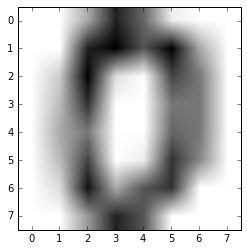

In [8]:
plt.imshow(np_image, cmap='gray_r')

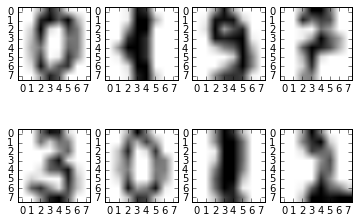

In [9]:
fig, axes = plt.subplots(2,4)

axes[0 , 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axes[0 , 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axes[0 , 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axes[0 , 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axes[1 , 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axes[1 , 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axes[1 , 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axes[1 , 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

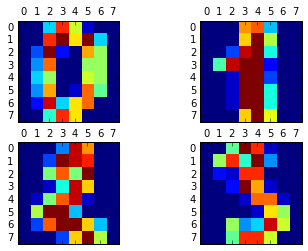

In [10]:
fig, axes = plt.subplots(2,2)

axes[0 , 0].matshow(digits.images[0]) 
axes[0 , 1].matshow(digits.images[1]) 

axes[1 , 0].matshow(digits.images[2]) 
axes[1 , 1].matshow(digits.images[3])

plt.show() 

## K-Nearest Neighbors Model
While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption.

This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [11]:
# Split up the data into train and test sets
train = data.sample(frac=0.8)
test = data[~data.index.isin(train.index)]

In [12]:
print('The train shape is {} and the test shape is {}.\nThe sum is {}'.format(train.shape[0],test.shape[0],train.shape[0]+test.shape[0]))

The train shape is 1438 and the test shape is 359.
The sum is 1797


For splitting we'll use [cross validation with KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). Its split method  will generate indices to split data into training and test set.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train_knn(neighbors, train_features, train_targets):
    """trains k-nearest neighbors models
    
    Args: 
        neighbors(int): the number of neighbor
        train_features (pandas.DataFrame): the data to train the model
        train_target(pandas.Series): the labels for each row
        
    Returns:
        a trained model
    """
    knn = KNeighborsClassifier(neighbors)
    knn.fit(train_features, train_targets)
    
    return knn

def test_knn(model, test_features, test_targets):
    """Test the model and compute its accuracy
    
    Args:
        model: the model to test
        test_features (pandas.DataFrame): the data to test the model
        test_target (pandas.Serie): the labels to compute the accuracy
        
    Returns:
        accuracy(float): the accuracy of the model
    """
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_targets
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    """Performs 4-fold cross validation 
    
    Args:
        k(int): the number of neighbors for the algorithm
        
    Returns:
        accuracy (float): the avg accuray calculated on the 4 folds
    """
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test_knn(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

for k in [1,5,10]:
    knn_one_accuracies = cross_validate(k)
    print(k," : ",np.mean(knn_one_accuracies))
    
    

1  :  0.9677233358079684
5  :  0.9621665429349171
10  :  0.9527097253155159


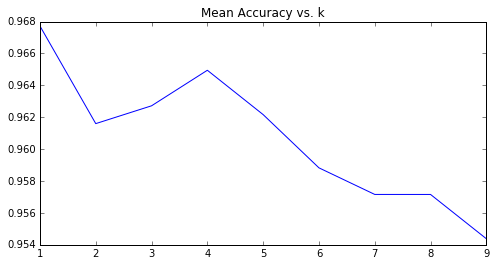

In [14]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

## Neural Network With One Hidden Layer

There are a few downsides to using k-nearest neighbors:

* high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* no model representation to debug and explore

Let's now try a neural network with a single hidden layer with the [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) package from scikit-learn.

In [15]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import KFold

# fold_nn_accuracies = list()
# kf = KFold(n_splits=4, random_state=2)
# hidden_layer = [8, 16, 32, 64, 128, 254]

# for neurons in hidden_layer:
#     fold_accuracies = []
#     nn = MLPClassifier(hidden_layer_sizes=(neurons, ))
    
#     for train_index, test_index in kf.split(data):
#         train_feat, test_feat=data.loc[train_index], data.loc[test_index] 
#         train_lab,test_lab = labels.loc[train_index], labels.loc[test_index]
#         nn.fit(train_feat,train_lab)
#         overall_accuracy = test_knn(nn, test_feat, test_lab)
#         fold_accuracies.append(overall_accuracy)
#     fold_nn_accuracies.append(np.mean(fold_accuracies))

# for index, neurons in enumerate(hidden_layer):
#     print(neurons," : ",fold_nn_accuracies[index])
    
    

In [16]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [17]:
# Train and test a neural network model using a single hidden layer with different numbers of neurons
nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



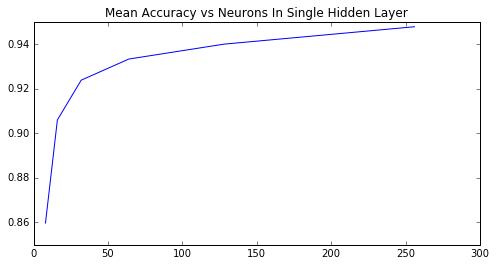

In [18]:
x=[i[0] for i in nn_one_neurons]

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs Neurons In Single Hidden Layer")
plt.plot(x, nn_one_accuracies)

### Summary:
It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

## Neural Network With Two Hidden Layers
Adding more neurons to a single hidden layer vastly improved the classification accuracy.

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [19]:
# Use 2 hidden layers instead in the network
nn_two_neurons=[
    (64,64),
    (128,128),
    (256,256)
]

nn_two_accuracies = []

for neurons in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

In [20]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [21]:
nn_two_accuracies

[0.9554813165058155, 0.9443429844097996, 0.9449034892353377]

### Summary
Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about [overfitting](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), using 4-fold cross validation also [gives me a bit more assurance](https://elitedatascience.com/overfitting-in-machine-learning#:~:text=Cross%2Dvalidation%20is%20a%20powerful,into%20k%20subsets%2C%20called%20folds.) that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## Neural Network With Three Hidden Layers
Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [22]:
def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [23]:
nn_three_neurons =[
    (10,10,10),
    (64,64,64),
    (128,128,128)
]

nn_three_accuracies=[]

for neurons in nn_three_neurons:
    nn_accuracies=cross_validate(neurons)
    nn_mean_accuracy=np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



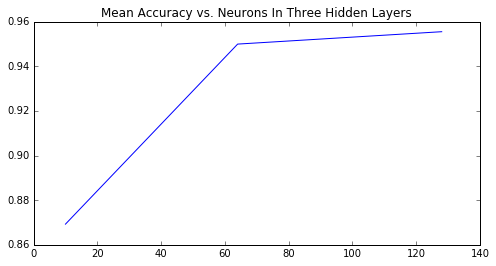

In [24]:
plt.figure(figsize=(8,4))

plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x,nn_three_accuracies)

In [25]:
nn_three_accuracies

[0.8692567818654774, 0.9499238201412116, 0.9554738015607581]

### Summary
Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.

## Next Steps
Here are some next steps to try:

* Use the existing pipeline you've built to try other machine learning models:
    * Decision Tree Models
    * Random Forest Models
* Write up a summary of the effectiveness of the different models  tried, with data to back up our conclusions.
* Experiment with different activation functions to see if the accuracies improve.
* Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline.
Visualization of MLP Weights on MNIST